# Questions

## Fuzzy sets

1. What is the difference between a characteristic function and a membership function?

A characteristic function is associated with classical set theory, which determines in a binary way wether or not an element belongs to a set. The membership function is a concept in fuzzy logic which dictates the degree of membership of said element in a fuzzy set. While the characteristic function has values of 0 or 1, the membership function can take any value between 0 and 1. The higher the value, the higher is the degree of membership to the fuzzy set. This allows fuzzy logic to model uncertainty, unlike classical set theory.

Consider the two fuzzy sets in the Universe of Discourse X ={−8, −6, −4, −2, 0, 2, 4, 6, 8}:


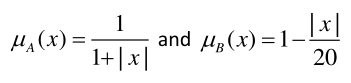

In [1]:
from IPython.display import Image

# Provide the file path or URL of the image
#image_path = 'C:\Users\alvar\OneDrive\IST\5ºAno\1ºSemestre\Sistemas Inteligentes\Git\Intelligent_Systems'

# Display the image
Image(filename="img.PNG")


a) Are the membership functions valid in the given Universe?

Yes, because the membership values from either function has values between 0 and 1 regardless of the element considered from the universe of discourse X.

b) Compute the α-cuts of A and B for α = 0.3

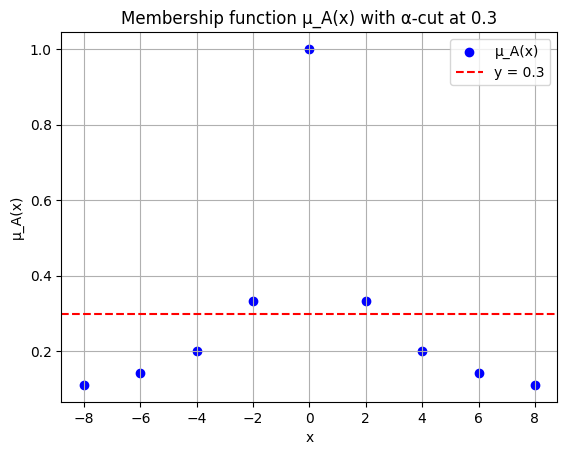

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x_values = np.array([-8, -6, -4, -2, 0, 2, 4, 6, 8])

# Calculate the corresponding y values using the function
y_values = 1 / (1 + np.abs(x_values))

# Create the plot with scatter points
plt.scatter(x_values, y_values, color='blue', marker='o', label='μ_A(x)') 

# Add a horizontal line at y=0.3
plt.axhline(y=0.3, color='red', linestyle='--', label='y = 0.3')

# Add labels and title
plt.xlabel('x')
plt.ylabel('μ_A(x)')
plt.title('Membership function μ_A(x) with α-cut at 0.3')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('membership_function_A.png')
plt.show()

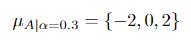

In [45]:
from IPython.display import Image

# Provide the file path or URL of the image
#image_path = 'C:/Users/AndreLopes/Desktop/git/Intelligent_Systems/1ba.png'

# Display the image
Image(filename="1ba.png")

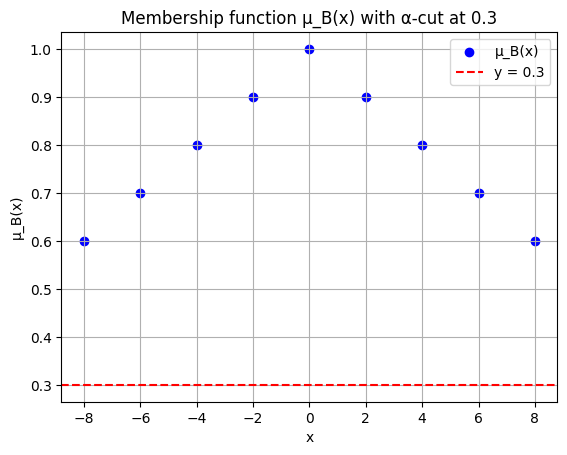

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x_values = np.array([-8, -6, -4, -2, 0, 2, 4, 6, 8])

# Calculate the corresponding y values using the function
y_values = 1 - np.abs(x_values) / 20

# Create the plot
plt.scatter(x_values, y_values, color='blue', marker='o', label='μ_B(x)') 
# Add a horizontal line at y=0.3
plt.axhline(y=0.3, color='red', linestyle='--', label='y = 0.3')

# Add labels and title
plt.xlabel('x')
plt.ylabel('μ_B(x)')
plt.title('Membership function μ_B(x) with α-cut at 0.3')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('membership_function_B.png')
plt.show()

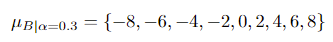

In [46]:
from IPython.display import Image

# Provide the file path or URL of the image
#image_path = 'C:/Users/AndreLopes/Desktop/git/Intelligent_Systems/1bb.png'

# Display the image
Image(filename="1bb.png")

1. Develop a type zero or type one Takagi-Sugeno fuzzy model to classify the data. It is up
to you to select the relevant quantities for various model parameters. However, you are
required to estimate the optimal consequent parameters by using least-mean squares
estimation. The input/output space partition should be obtained using either a grid, or
fuzzy clustering (FCM or GK). You can use the Python libraries PyFUME or Scikit-Fuzzy. If
you choose to use Matlab please use Mathworks Fuzzy Toolbox to derive the model.
Save your optimal model along with any other relevant information (in Matlab it will be
the file model.mat), or your Jupyter notebook and all the results from Python.

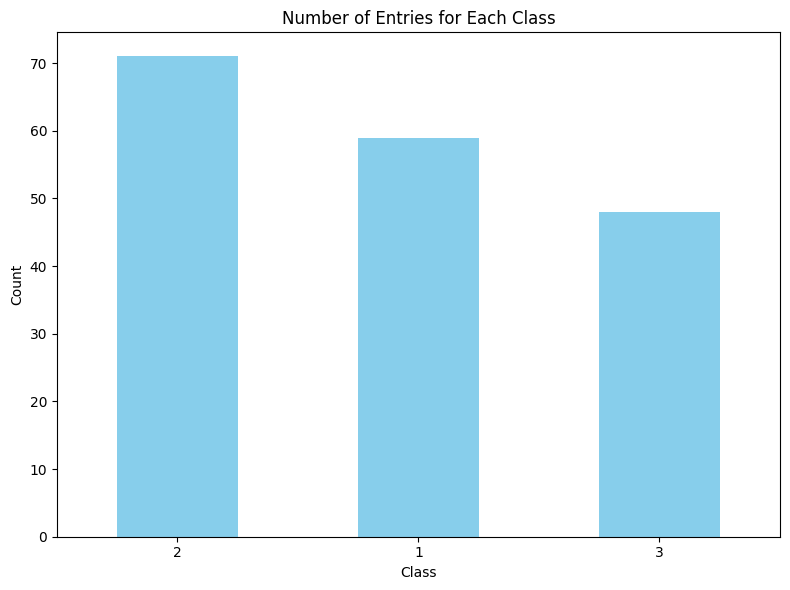

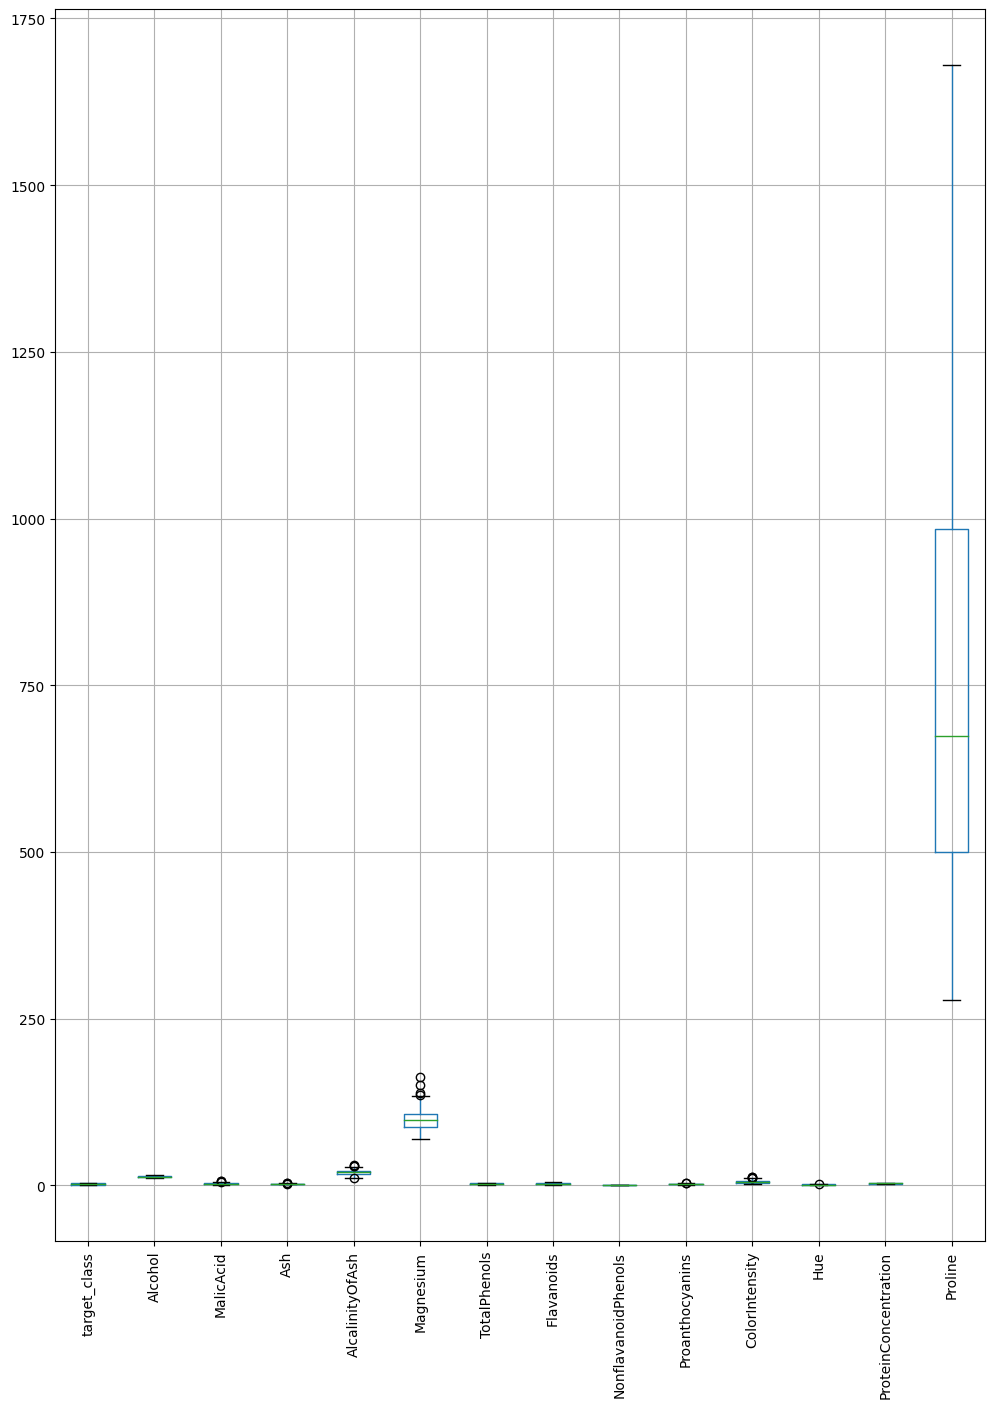

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

attributes = ['target_class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols','Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue','ProteinConcentration', 'Proline']
features = ['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols','Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue','ProteinConcentration', 'Proline']
df = pd.read_csv('wine.data', names=attributes)

# Check if df has missing values
if df.isnull().values.any():
    print('The dataset has missing values')

# Check if df has duplicate rows
if df.duplicated().any():
    print('The dataset has duplicate rows')

# Check if df has duplicate columns
if df.columns.duplicated().any():
    print('The dataset has duplicate columns')

# Create a bar plot of the number of entries for each class  
class_counts = df['target_class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
ax = class_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Entries for Each Class')

# Correct the orientation of x-axis labels to be horizontal (0 degrees)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the plot
plt.tight_layout()  # Optional: Ensures labels are not cut off
plt.savefig('bar_plot.png')
plt.show()

plt.figure(figsize=(12, 16))
df.boxplot(rot=90)
plt.xticks(rotation=90)
plt.savefig('data_distribution.png')
plt.show()

 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
Accuracy: 0.958
Kappa Score: 0.937
Matthews Correlation Coefficient: 0.939
F1 Score: 0.959
Precision Score: 0.957
Recall Score: 0.966


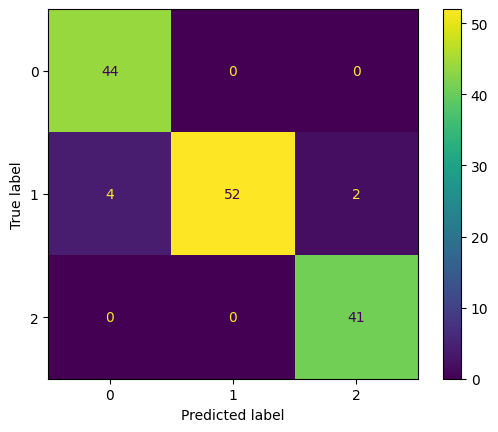

In [43]:
# %% Imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, precision_score, recall_score, f1_score
from numpy import clip, column_stack, argmax, vectorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
data = scaler.fit_transform(df[features])
data = df[features].to_numpy()


# Define X as all columns except 'target_class'
X = data
# Define y as the 'target_class' column
y = df['target_class']
y = y.to_numpy()

# random_state=42
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

# Create 1-vs-all target vector
y_train_0_vs_all = vectorize({1:1,2:0,3:0}.get)(y_train)
# Cluster the input-output space
cl = Clusterer(x_train=X_train, y_train=y_train_0_vs_all, nr_clus=7)
clust_centers, part_matrix, _ = cl.cluster(method='gk')
# Estimate membership functions parameters
ae = AntecedentEstimator(X_train, part_matrix)
antecedent_params = ae.determineMF()
# Estimate consequent parameters
ce = ConsequentEstimator(X_train, y_train_0_vs_all, part_matrix)
conseq_params = ce.suglms()
# Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
model_0_vs_all = modbuilder.get_model()

# %% Train 1 vs all model

# Create 2-vs-all target vector
y_train_1_vs_all = vectorize({1:0,2:1,3:0}.get)(y_train)
# Cluster the input-output space
cl = Clusterer(x_train=X_train, y_train=y_train_1_vs_all, nr_clus=7)
clust_centers, part_matrix, _ = cl.cluster(method='gk')
# Estimate membership functions parameters
ae = AntecedentEstimator(X_train, part_matrix)
antecedent_params = ae.determineMF()
# Estimate consequent parameters
ce = ConsequentEstimator(X_train, y_train_1_vs_all, part_matrix)
conseq_params = ce.suglms()
# Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
model_1_vs_all = modbuilder.get_model()

# %% Train 2 vs all model

# Create 2-vs-all target vector
y_train_2_vs_all = vectorize({1:0,2:0,3:1}.get)(y_train)
# Cluster the input-output space
cl = Clusterer(x_train=X_train, y_train=y_train_2_vs_all, nr_clus=7)
clust_centers, part_matrix, _ = cl.cluster(method='gk')
# Estimate membership functions parameters
ae = AntecedentEstimator(X_train, part_matrix)
antecedent_params = ae.determineMF()
# Estimate consequent parameters
ce = ConsequentEstimator(X_train, y_train_2_vs_all, part_matrix)
conseq_params = ce.suglms()
# Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
model_2_vs_all = modbuilder.get_model()

# %% Get class probabilities predictions for each ova model

# Class probabilities predictions for 0 vs all
modtester = SugenoFISTester(model_0_vs_all, X_test, features)
y_pred_probs_0_vs_all = clip(modtester.predict()[0], 0, 1)
y_pred_probs_0_vs_all = column_stack((1 - y_pred_probs_0_vs_all, y_pred_probs_0_vs_all))

# Class probabilities predictions for 1 vs all
modtester = SugenoFISTester(model_1_vs_all, X_test, features)
y_pred_probs_1_vs_all = clip(modtester.predict()[0], 0, 1)
y_pred_probs_1_vs_all = column_stack((1 - y_pred_probs_1_vs_all, y_pred_probs_1_vs_all))

# Class probabilities predictions for 2 vs all
modtester = SugenoFISTester(model_2_vs_all, X_test, features)
y_pred_probs_2_vs_all = clip(modtester.predict()[0], 0, 1)
y_pred_probs_2_vs_all = column_stack((1 - y_pred_probs_2_vs_all, y_pred_probs_2_vs_all))

# %% Aggregate class probabilities and get class predictions

y_pred_probs = column_stack((y_pred_probs_0_vs_all[:,1],y_pred_probs_0_vs_all[:,0],y_pred_probs_0_vs_all[:,0])) +\
               column_stack((y_pred_probs_1_vs_all[:,0],y_pred_probs_1_vs_all[:,1],y_pred_probs_1_vs_all[:,0])) +\
               column_stack((y_pred_probs_2_vs_all[:,0],y_pred_probs_2_vs_all[:,0],y_pred_probs_2_vs_all[:,1]))
y_pred_probs = y_pred_probs/y_pred_probs.sum(axis=1,keepdims=1)

y_pred = argmax(y_pred_probs,axis=1) + 1

# %% Compute classification metrics
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(acc_score))
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa Score: {:.3f}".format(kappa))
matthews = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient: {:.3f}".format(matthews))
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: {:.3f}".format(f1))
precision = precision_score(y_test, y_pred, average='macro')
print("Precision Score: {:.3f}".format(precision))
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score: {:.3f}".format(recall))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.savefig('confusion_matrix.png')
plt.show()

 * Detected 1 rules / clusters
 * Detected Sugeno model type
 * Detected 1 rules / clusters
 * Detected Sugeno model type
 * Detected 1 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 11 rules / clusters
 * Detected Sugeno model type
 * Detected 11 rules / 

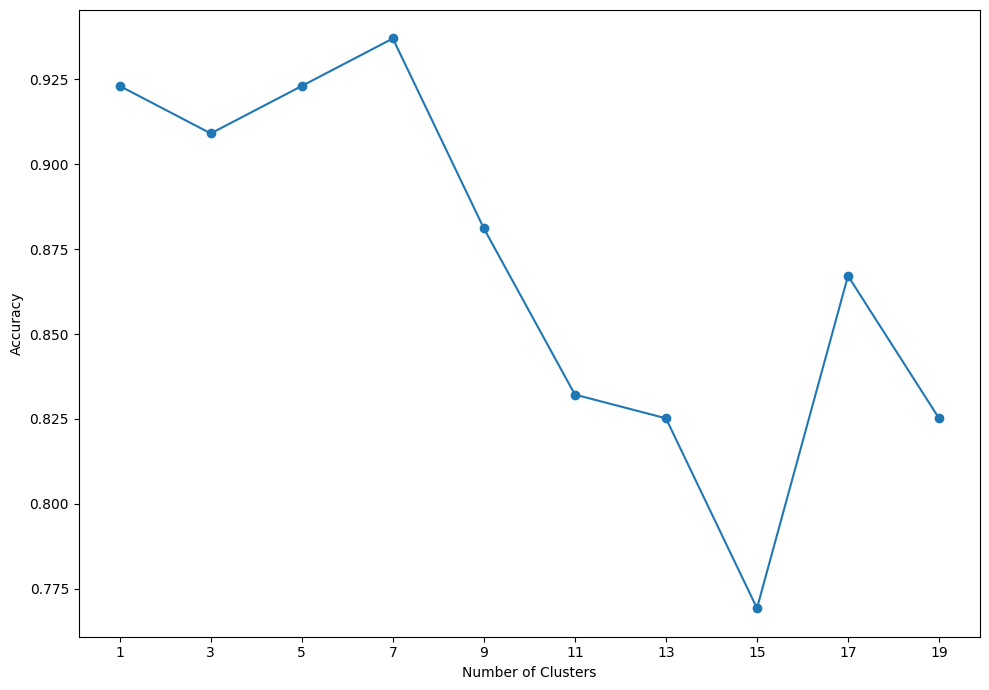

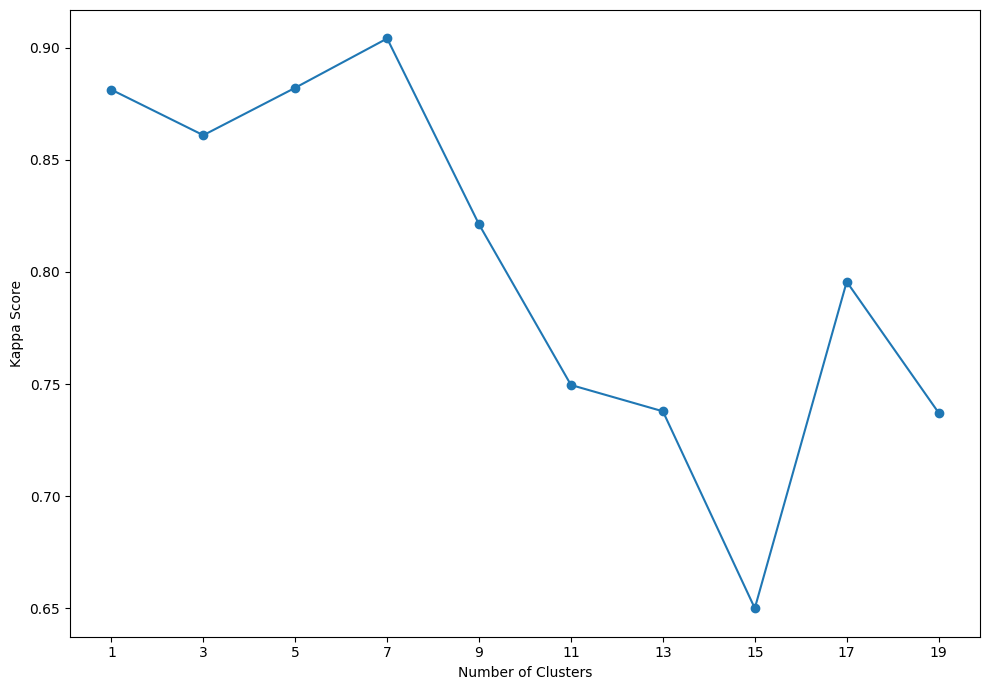

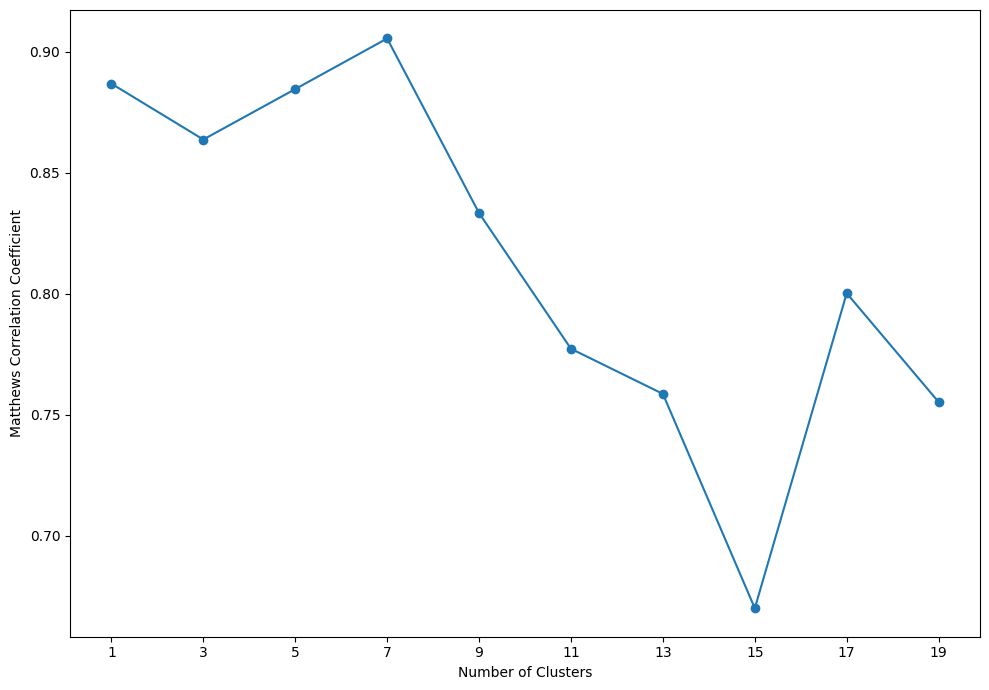

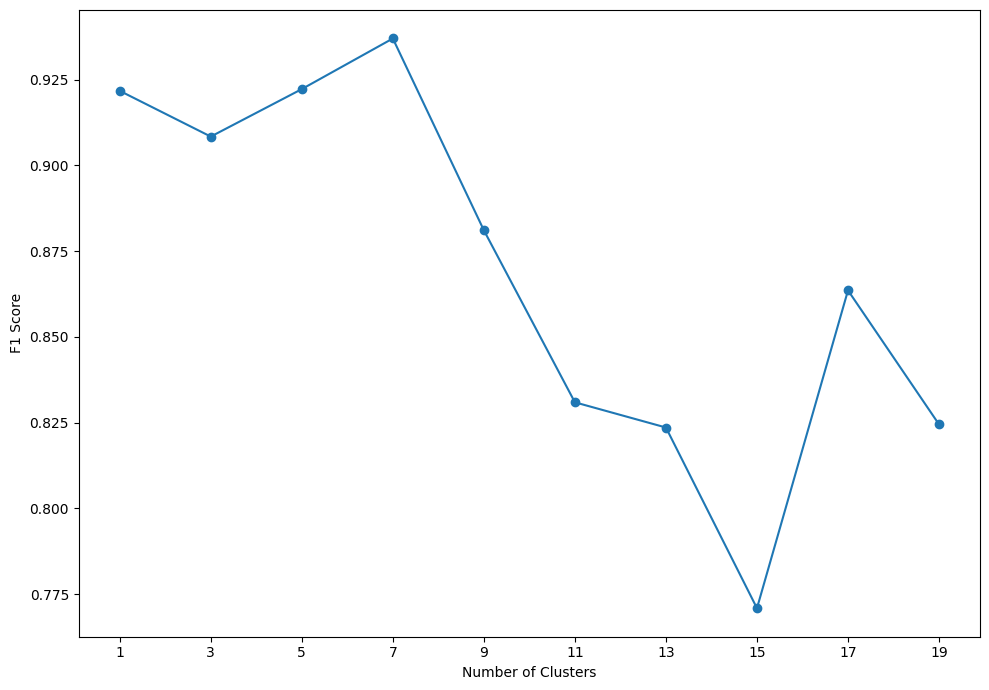

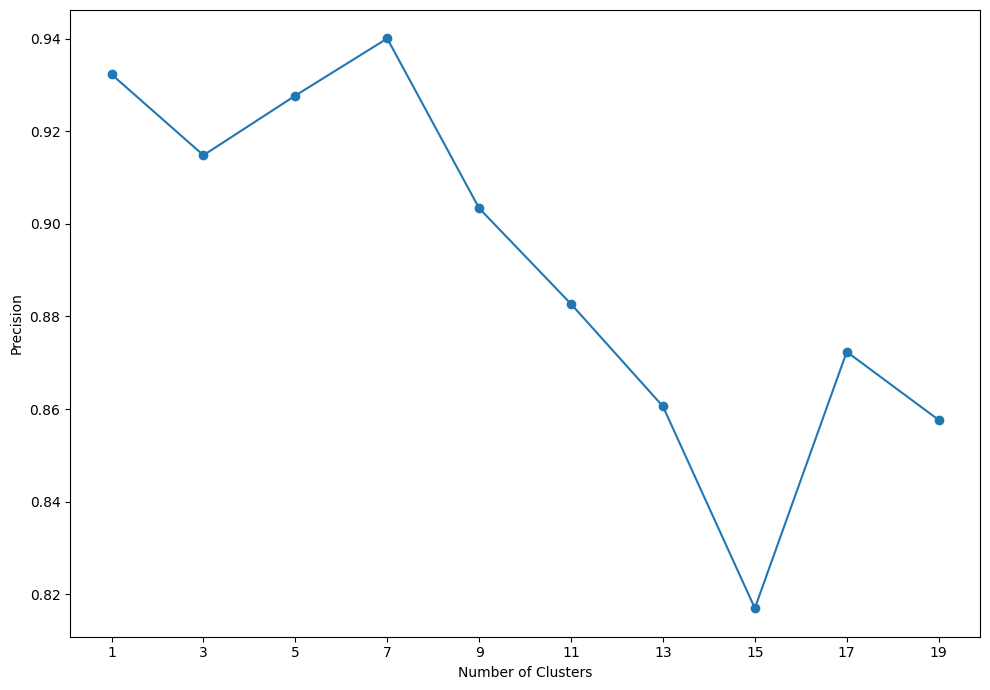

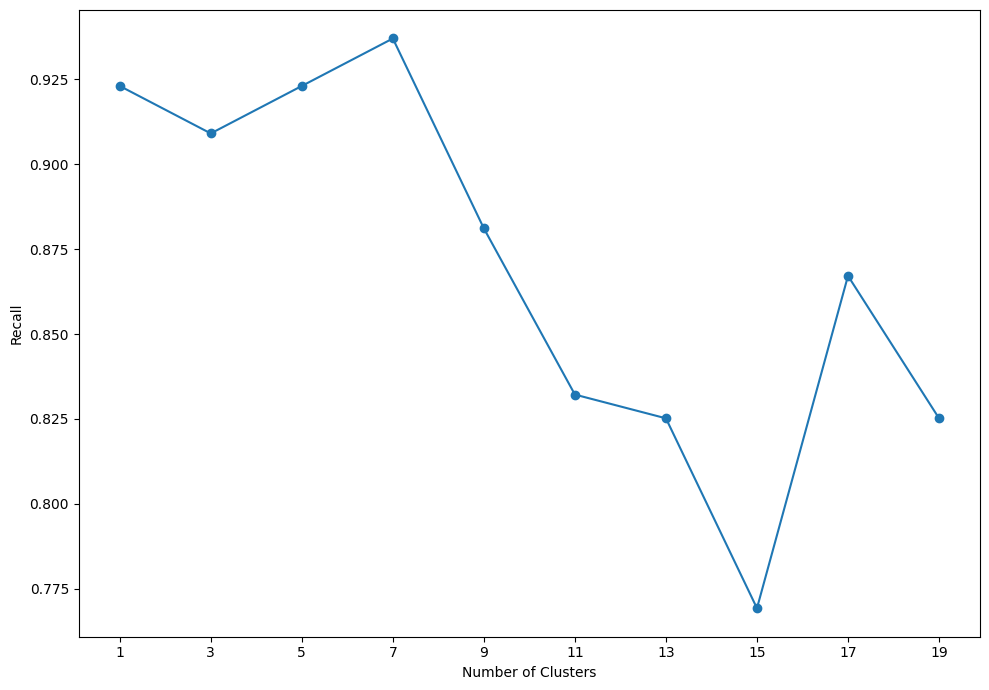

In [38]:
# %% Imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from numpy import clip, column_stack, argmax, vectorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

scaler = MinMaxScaler()
data = scaler.fit_transform(df[features])
#data = df[features].to_numpy()

# Define X as all columns except 'target_class'
X = data
# Define y as the 'target_class' column
y = df['target_class']
y = y.to_numpy() 

# random_state=42
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

# Create 0-vs-all target vector
y_train_0_vs_all = vectorize({1:1,2:0,3:0}.get)(y_train)
# Create 1-vs-all target vector
y_train_1_vs_all = vectorize({1:0,2:1,3:0}.get)(y_train)
# Create 2-vs-all target vector
y_train_2_vs_all = vectorize({1:0,2:0,3:1}.get)(y_train)

# Initialize lists to store results
num_clusters_list = list(range(1, 21, 2))
accuracy_scores = []
kappa_scores = []
matthews_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for num_clusters in num_clusters_list:
    # Cluster the input-output space
    cl = Clusterer(x_train=X_train, y_train=y_train_0_vs_all, nr_clus=num_clusters)
    clust_centers, part_matrix, _ = cl.cluster(method='fcm')
    # Estimate membership functions parameters
    ae = AntecedentEstimator(X_train, part_matrix)
    antecedent_params = ae.determineMF()
    # Estimate consequent parameters
    ce = ConsequentEstimator(X_train, y_train_0_vs_all, part_matrix)
    conseq_params = ce.suglms()
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
    model_0_vs_all = modbuilder.get_model()

    # Cluster the input-output space
    cl = Clusterer(x_train=X_train, y_train=y_train_1_vs_all, nr_clus=num_clusters)
    clust_centers, part_matrix, _ = cl.cluster(method='fcm')
    # Estimate membership functions parameters
    ae = AntecedentEstimator(X_train, part_matrix)
    antecedent_params = ae.determineMF()
    # Estimate consequent parameters
    ce = ConsequentEstimator(X_train, y_train_1_vs_all, part_matrix)
    conseq_params = ce.suglms()
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
    model_1_vs_all = modbuilder.get_model()

    cl = Clusterer(x_train=X_train, y_train=y_train_2_vs_all, nr_clus=num_clusters)
    clust_centers, part_matrix, _ = cl.cluster(method='fcm')
    # Estimate membership functions parameters
    ae = AntecedentEstimator(X_train, part_matrix)
    antecedent_params = ae.determineMF()
    # Estimate consequent parameters
    ce = ConsequentEstimator(X_train, y_train_2_vs_all, part_matrix)
    conseq_params = ce.suglms()
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
    model_2_vs_all = modbuilder.get_model()
    
    # %% Get class probabilities predictions for each ova model

    # Class probabilities predictions for 0 vs all
    modtester = SugenoFISTester(model_0_vs_all, X_test, features)
    y_pred_probs_0_vs_all = clip(modtester.predict()[0], 0, 1)
    y_pred_probs_0_vs_all = column_stack((1 - y_pred_probs_0_vs_all, y_pred_probs_0_vs_all))

    # Class probabilities predictions for 1 vs all
    modtester = SugenoFISTester(model_1_vs_all, X_test, features)
    y_pred_probs_1_vs_all = clip(modtester.predict()[0], 0, 1)
    y_pred_probs_1_vs_all = column_stack((1 - y_pred_probs_1_vs_all, y_pred_probs_1_vs_all))

    # Class probabilities predictions for 2 vs all
    modtester = SugenoFISTester(model_2_vs_all, X_test, features)
    y_pred_probs_2_vs_all = clip(modtester.predict()[0], 0, 1)
    y_pred_probs_2_vs_all = column_stack((1 - y_pred_probs_2_vs_all, y_pred_probs_2_vs_all))

    # %% Aggregate class probabilities and get class predictions

    y_pred_probs = column_stack((y_pred_probs_0_vs_all[:,1],y_pred_probs_0_vs_all[:,0],y_pred_probs_0_vs_all[:,0])) +\
                   column_stack((y_pred_probs_1_vs_all[:,0],y_pred_probs_1_vs_all[:,1],y_pred_probs_1_vs_all[:,0])) +\
                   column_stack((y_pred_probs_2_vs_all[:,0],y_pred_probs_2_vs_all[:,0],y_pred_probs_2_vs_all[:,1]))
    y_pred_probs = y_pred_probs/y_pred_probs.sum(axis=1,keepdims=1)

    y_pred = argmax(y_pred_probs,axis=1) + 1

    acc_score = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    matthew = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(acc_score)
    kappa_scores.append(kappa)
    matthews_scores.append(matthew)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

plt.figure(figsize=(10, 7))
plt.plot(num_clusters_list, accuracy_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Accuracy")
plt.savefig('accuracy.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(num_clusters_list, kappa_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Kappa Score")
plt.savefig('kappa.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(num_clusters_list, matthews_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Matthews Correlation Coefficient")
plt.savefig('matthews.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(num_clusters_list, f1_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("F1 Score")
plt.savefig('f1.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(num_clusters_list, precision_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Precision")
plt.savefig('precision.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(num_clusters_list, recall_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Recall")
plt.savefig('recall.png')
plt.tight_layout()
plt.show()

2. Write a brief report G**_A1_report (where “**” should be replaced by your group
number) in which you explain how you determined the classification model. This report
should include also the main obtained results, which must be discussed. The report can
be obtained directly from your notebook as long as it includes all the referred
information (you can use Markdown for the text of the report). A pdf file generated by
LATEX or word is also acceptable.

3. Write a script (in Matlab is model.m in Python is for example model.py) that reads
your data (as e.g. model.mat) and classify the test set. Your script should save the
vector of classification values y to a file.

In [47]:
import csv
import numpy as np

# Define the filename for the CSV file
file_name = 'classification_results.csv'

# Open the file for writing
with open(file_name, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)
    
    # Write a header row
    csv_writer.writerow(['True_Y', 'Predicted_Y'])
    
    # Write the true y values and predicted values to the CSV file
    for true_val, predicted_val in zip(y_test, y_pred):
        csv_writer.writerow([true_val, predicted_val])

print(f'True and predicted values saved to {file_name}')


True and predicted values saved to classification_results.csv


4. Your deliverables should be available in the group GitHub and the report
G**_A1_report.pdf) is delivered in Fenix system and has to include the link for
GitHub .